# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import statsmodels.api as sm

%matplotlib inline

In [2]:
## Load the data into a DataFrame
df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

In [3]:
# Create a copy of the data
data = df

In [4]:
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85,Story,1071100,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

In [5]:
data.shape

(270955, 18)

In [6]:
data.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
del data['County Number']

In [8]:
del data['Item Number']

In [9]:
# Convert dates
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# Remove $ from items in columns
data['State Bottle Cost'] = data['State Bottle Cost'].replace('\$', '', regex=True)
data['State Bottle Retail'] = data['State Bottle Retail'].replace('\$', '', regex=True)
data['Sale (Dollars)'] = data['Sale (Dollars)'].replace('\$', '', regex=True)

In [11]:
# Convert int to float
data['Store Number'] = data['Store Number'].astype(int)
data['Vendor Number'] = data['Vendor Number'].astype(int)
data['Bottle Volume (ml)'] = data['Bottle Volume (ml)'].astype(float)
data['Bottles Sold'] = data['Bottles Sold'].astype(float)
data['State Bottle Cost'] = data['State Bottle Cost'].astype(float)
data['State Bottle Retail'] = data['State Bottle Retail'].astype(float)
data['Sale (Dollars)'] = data['Sale (Dollars)'].astype(float)

In [12]:
# Check to see if columns were renamed and and types changed.
data.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Description                 object
Bottle Volume (ml)              float64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                    float64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [13]:
# Checking which columns have null values in the dataset.
data.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [14]:
# Dropping the Null values from the dataset.
data = data.dropna(axis = 0, how = 'any')

In [15]:
# Confirming the null values were removed.
data.isnull().sum()

Date                     0
Store Number             0
City                     0
Zip Code                 0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

### Statistical Analysis

In [16]:
data.describe()

,Store Number,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,269258.000000,269258.000000,269258.00000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000
mean,3587.695311,1043866.436377,256.36045,925.217375,9.763293,14.660848,9.874028,128.828546,8.991069,2.375397
std,946.505088,50218.337540,140.98313,492.837459,7.039787,10.559164,24.072335,383.477046,28.963204,7.651262
min,2106.000000,1011100.000000,10.00000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2604.000000,1012200.000000,115.00000,750.000000,5.500000,8.250000,2.000000,30.420000,1.500000,0.400000
50%,3721.000000,1031200.000000,260.00000,750.000000,8.000000,12.110000,6.000000,70.560000,5.250000,1.390000
75%,4376.000000,1062310.000000,380.00000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,9023.000000,1701100.000000,978.00000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


In [17]:
corr = data.corr()

In [18]:
corr

,Store Number,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Number,1.000000,-0.012263,-0.005079,-0.062526,-0.071294,-0.071430,0.014662,-0.017750,-0.017375,-0.017364
Category,-0.012263,1.000000,0.091512,-0.009055,-0.013571,-0.013758,-0.000080,0.006542,-0.004192,-0.004183
Vendor Number,-0.005079,0.091512,1.000000,0.025909,0.003616,0.003223,-0.002303,-0.012361,-0.007254,-0.007250
Bottle Volume (ml),-0.062526,-0.009055,0.025909,1.000000,0.312930,0.313911,-0.012183,0.082553,0.156141,0.155973
State Bottle Cost,-0.071294,-0.013571,0.003616,0.312930,1.000000,0.999960,-0.062832,0.135770,0.009301,0.009270
State Bottle Retail,-0.071430,-0.013758,0.003223,0.313911,0.999960,1.000000,-0.062684,0.135954,0.009742,0.009711
Bottles Sold,0.014662,-0.000080,-0.002303,-0.012183,-0.062832,-0.062684,1.000000,0.825912,0.883972,0.884002
Sale (Dollars),-0.017750,0.006542,-0.012361,0.082553,0.135770,0.135954,0.825912,1.000000,0.846373,0.846385
Volume Sold (Liters),-0.017375,-0.004192,-0.007254,0.156141,0.009301,0.009742,0.883972,0.846373,1.000000,1.000000
Volume Sold (Gallons),-0.017364,-0.004183,-0.007250,0.155973,0.009270,0.009711,0.884002,0.846385,1.000000,1.000000


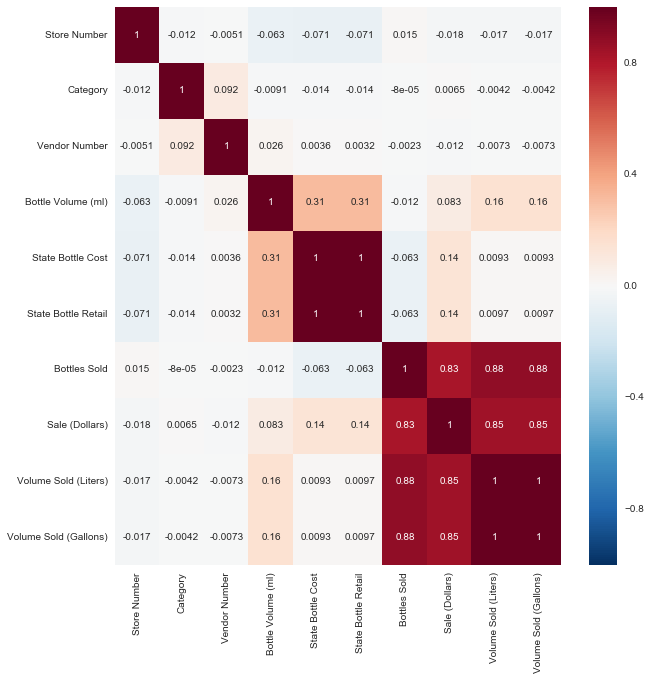

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [20]:
data.head()

,Date,Store Number,City,Zip Code,County,Category,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,Bremer,1051100,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,Scott,1011100,BLENDED WHISKIES,395,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,Story,1071100,AMERICAN COCKTAILS,395,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,Wright,1031080,VODKA 80 PROOF,297,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [21]:
# Cleaned CSV
data.to_csv('Iowa_Liquor_sales_sample_10pct-cleaned.csv')

In [22]:
!pwd

/Users/isaacmoore/Google Drive/data_science/general_assembly/Projects/DSI_SM_Project3


In [23]:
!ls

Iowa_Liquor_sales_sample_10pct-cleaned.csv
Iowa_Liquor_sales_sample_10pct.csv
Project 3-isaacmoore.ipynb
readme.md


# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [24]:
exdata = data

In [25]:
# 2015 Sales
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (exdata['Date'] >= start_date) & (exdata['Date'] <= end_date)
sales_2015 = exdata[mask]
sales_2015.head()

,Date,Store Number,City,Zip Code,County,Category,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,Bremer,1051100,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38
4,2015-08-18,3654,BELMOND,50421,Wright,1031080,VODKA 80 PROOF,297,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55
5,2015-04-20,2569,CEDAR RAPIDS,52402,Linn,1041100,AMERICAN DRY GINS,205,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77
6,2015-08-05,2596,OTTUMWA,52501,Wapello,1051010,AMERICAN GRAPE BRANDIES,85,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59
7,2015-06-25,3456,CLEAR LAKE,50428,Cerro Gordo,1012100,CANADIAN WHISKIES,65,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92


In [26]:
store_sales_2015 = pd.pivot_table(sales_2015, index='Store Number', values='Sale (Dollars)', aggfunc=np.sum)
store_sales_2015 = pd.DataFrame(store_sales_2015)
store_sales_2015.head()

,Sale (Dollars)
Store Number,
2106,146038.70
2113,9310.22
2130,111583.91
2152,7721.08
2178,24324.18


In [27]:
# 2016 Sales
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20161231")
mask = (exdata['Date'] >= start_date) & (exdata['Date'] <= end_date)
sales_2016 = exdata[mask]
sales_2016.head()

,Date,Store Number,City,Zip Code,County,Category,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1,2016-03-02,2614,DAVENPORT,52807,Scott,1011100,BLENDED WHISKIES,395,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,Story,1071100,AMERICAN COCKTAILS,395,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
8,2016-01-04,4757,BONDURANT,50035,Polk,1032080,IMPORTED VODKA,370,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.0,0.79
13,2016-02-29,4673,WEST POINT,52656,Lee,1081300,PEPPERMINT SCHNAPPS,322,Kinky Liqueur,750,10.00,15.00,12,180.00,9.0,2.38


In [28]:
store_sales_2016 = pd.pivot_table(sales_2016, index='Store Number', values='Sale (Dollars)', aggfunc=np.sum)
store_sales_2016 = pd.DataFrame(store_sales_2016)
store_sales_2016.head()

,Sale (Dollars)
Store Number,
2106,30478.75
2113,2065.90
2130,27856.11
2152,904.66
2178,5588.50


In [29]:
store_sales_2016.shape

(1280, 1)

In [30]:
sales_1516 = pd.concat((store_sales_2015, store_sales_2016), axis = 1)
sales_1516.columns = ['2015_sales', '2016_sales']
sales_1516.head()

,2015_sales,2016_sales
Store Number,,
2106,146038.70,30478.75
2113,9310.22,2065.90
2130,111583.91,27856.11
2152,7721.08,904.66
2178,24324.18,5588.50


In [31]:
sales_1516.isnull().sum()

2015_sales     6
2016_sales    98
dtype: int64

In [32]:
sales_1516['total'] = sales_1516['2015_sales'] + sales_1516['2016_sales']
sales_1516.sort('total', ascending=False).head()

/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,2015_sales,2016_sales,total
Store Number,,,
2633,997924.42,217474.60,1215399.02
4829,874664.18,207277.70,1081941.88
2512,419534.61,112149.81,531684.42
3385,439584.35,64472.88,504057.23
3420,348837.36,49187.88,398025.24


In [33]:
county_sales = pd.pivot_table(exdata, index = 'County', values = 'Sale (Dollars)', aggfunc=np.sum)

county_sales = pd.DataFrame(county_sales)
county_sales.sort('Sale (Dollars)', ascending=False)
county_sales_10 = county_sales.sort('Sale (Dollars)', ascending = False).head(10)
county_sales_10

/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Sale (Dollars)
County,
Polk,7747218.999999
Linn,3139999.480000
Scott,2457277.340000
Johnson,2077857.870000
Black Hawk,1928016.710000
Pottawattamie,1277581.170000
Woodbury,1249514.330000
Dubuque,1076389.240000
Story,1073666.430000


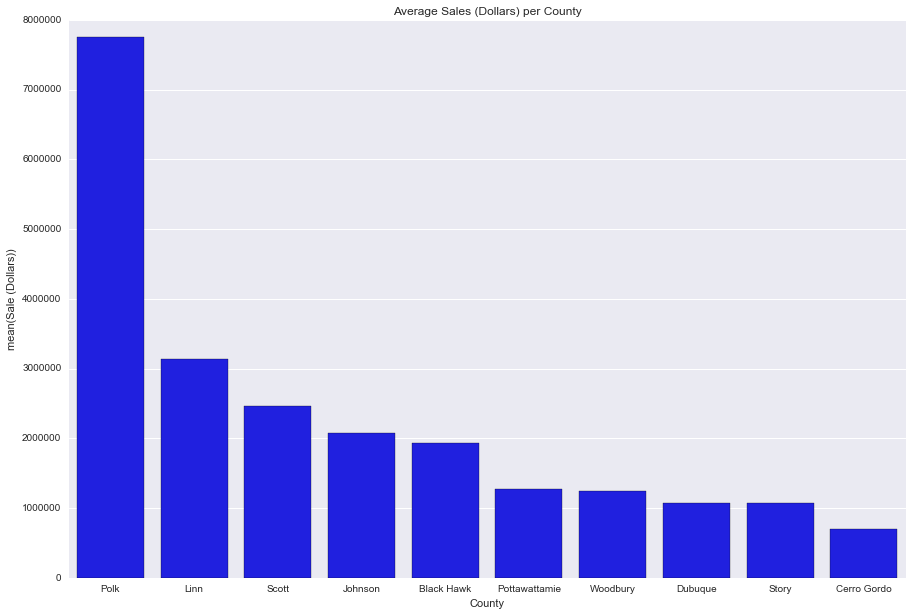

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x=county_sales_10.index,y=county_sales_10['Sale (Dollars)'], color='b').set(title='Average Sales (Dollars) per County')

In [35]:
county_gal = pd.pivot_table(exdata, index = 'County', values = 'Volume Sold (Gallons)', aggfunc=np.sum)

county_gal = pd.DataFrame(county_gal)
county_gal.sort('Volume Sold (Gallons)', ascending=False)
county_gal_10 = county_gal.sort('Volume Sold (Gallons)', ascending = False).head(10)
county_gal_10

/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Volume Sold (Gallons)
County,
Polk,132747.24
Linn,57904.04
Scott,42884.84
Black Hawk,34864.58
Johnson,34247.45
Pottawattamie,22663.95
Woodbury,22285.55
Dubuque,20871.82
Story,19670.92


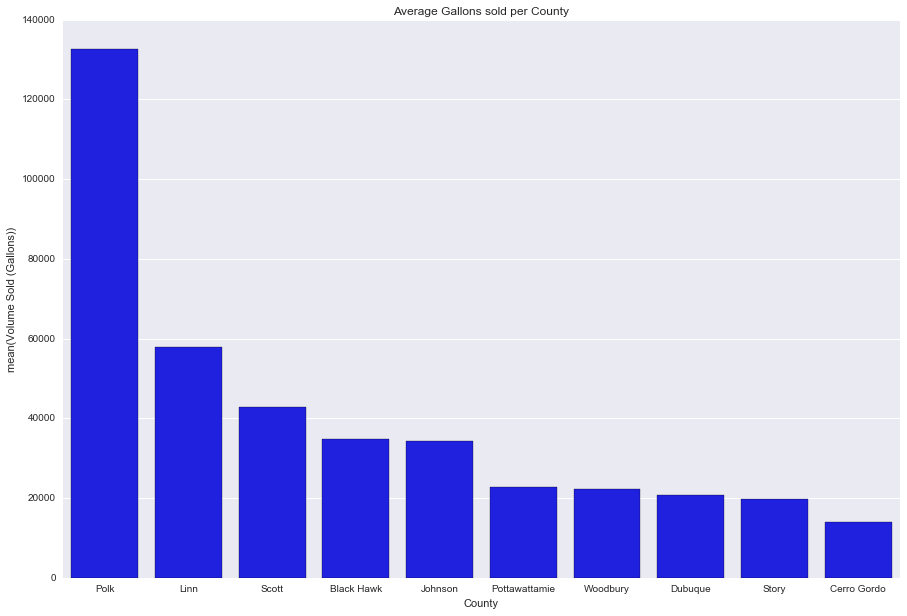

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x=county_gal_10.index,y=county_gal_10['Volume Sold (Gallons)'], color='b').set(title='Average Gallons sold per County')

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [37]:
polk = exdata[ exdata['County'] == 'Polk' ]
polk.head()

,Date,Store Number,City,Zip Code,County,Category,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
8,2016-01-04,4757,BONDURANT,50035,Polk,1032080,IMPORTED VODKA,370,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.0,0.79
10,2015-09-28,2648,WEST DES MOINES,50265,Polk,1011250,SINGLE BARREL BOURBON WHISKIES,65,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,4.5,1.19
28,2015-12-01,4375,GRIMES,50111,Polk,1031080,VODKA 80 PROOF,380,UV Vodka PET,1750,10.99,16.49,6,98.94,10.5,2.77
35,2015-04-02,2626,DES MOINES,50311,Polk,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Jagermeister Liqueur,375,6.52,9.78,4,39.12,1.5,0.40
36,2015-04-20,2532,DES MOINES,50317,Polk,1071100,AMERICAN COCKTAILS,285,Bartenders Hot Sex,1000,5.28,7.92,12,95.04,12.0,3.17


In [38]:
polk.describe()

,Store Number,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,48944.000000,48944.000000,48944.000000,48944.000000,48944.000000,48944.000000,48944.000000,48944.000000,48944.000000,48944.000000
mean,3570.304205,1042170.030341,256.865520,879.308169,10.125165,15.202882,11.843678,158.287410,10.265104,2.712227
std,1020.770092,45032.641021,141.659533,496.619868,8.162204,12.242765,31.217730,521.430608,34.467566,9.105284
min,2190.000000,1011100.000000,10.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2619.000000,1012300.000000,115.000000,750.000000,5.500000,8.250000,3.000000,33.750000,1.500000,0.400000
50%,3644.000000,1031200.000000,260.000000,750.000000,8.250000,12.380000,6.000000,77.980000,9.000000,2.380000
75%,4599.000000,1062300.000000,380.000000,1000.000000,12.070000,18.110000,12.000000,148.680000,10.500000,2.770000
max,5211.000000,1701100.000000,978.000000,6000.000000,425.000000,637.500000,1320.000000,36392.400000,1320.000000,348.710000


In [39]:
# above the mean
polk_sales = polk[ polk['Sale (Dollars)'] > polk['Sale (Dollars)'].mean() ]
polk_sales.head()

,Date,Store Number,City,Zip Code,County,Category,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
10,2015-09-28,2648,WEST DES MOINES,50265,Polk,1011250,SINGLE BARREL BOURBON WHISKIES,65,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,4.5,1.19
39,2016-03-07,2633,DES MOINES,50320,Polk,1011200,STRAIGHT BOURBON WHISKIES,461,Wild Turkey 101,1000,16.16,24.24,12,290.88,12.0,3.17
58,2015-09-16,4919,ALTOONA,50009,Polk,1031080,VODKA 80 PROOF,434,Hawkeye Vodka,1750,7.17,10.76,18,193.68,31.5,8.32
95,2015-06-26,2478,ALTOONA,50009,Polk,1042100,IMPORTED DRY GINS,260,Tanqueray Gin,750,12.25,18.38,12,220.56,9.0,2.38
104,2015-12-30,4829,DES MOINES,50314,Polk,1012200,SCOTCH WHISKIES,35,Dewars White Label Scotch,1000,17.50,26.25,24,630.00,24.0,6.34


In [40]:
# above the mean
polk_sales_items = pd.DataFrame(pd.pivot_table(polk_sales, index='Category Name', values='Sale (Dollars)', aggfunc=np.sum))
polk_salesitems_10 = polk_sales_items.sort('Sale (Dollars)', ascending=False).head(10)
polk_salesitems_10

/Users/isaacmoore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Sale (Dollars)
Category Name,
VODKA 80 PROOF,545687.58
CANADIAN WHISKIES,480237.44
IMPORTED VODKA,444641.15
TEQUILA,436795.54
WHISKEY LIQUEUR,406156.08
SPICED RUM,404112.30
STRAIGHT BOURBON WHISKIES,335885.96
TENNESSEE WHISKIES,277335.47
MISC. IMPORTED CORDIALS & LIQUEURS,217248.01


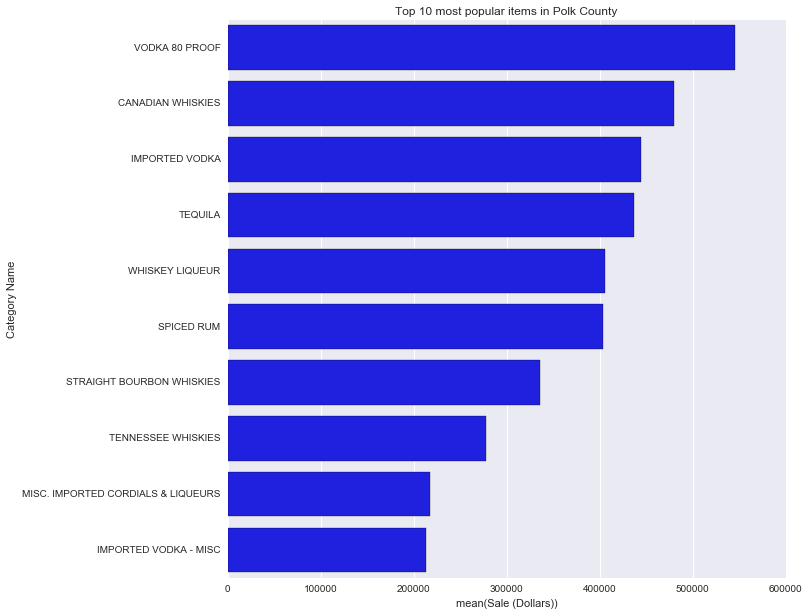

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(y=polk_salesitems_10.index, x=polk_salesitems_10['Sale (Dollars)'], color='b')\
.set(title='Top 10 most popular items in Polk County')

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of each store. You must use the sales from Jan to March per store as one of your variables.

In [42]:
# Filter Sales between Jan 1, 2015  and Mar 31, 2016.
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20161231")
mask = (exdata['Date'] >= start_date) & (exdata['Date'] <= end_date)
sales_Jan15_Mar16 = exdata[mask]
sales_Jan15_Mar16.head()

,Date,Store Number,City,Zip Code,County,Category,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,Bremer,1051100,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,Scott,1011100,BLENDED WHISKIES,395,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,Story,1071100,AMERICAN COCKTAILS,395,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,Wright,1031080,VODKA 80 PROOF,297,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [43]:
# Group data by each store number.
modeler = sales_Jan15_Mar16.groupby('Store Number').sum()
modeler.head()

,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Number,,,,,,,,,
2106,684160227,175235,595600,6722.95,10092.37,12573,176517.45,11836.10,3127.28
2113,191207086,43223,175625,1994.22,2993.26,830,11376.12,836.85,221.03
2130,531659974,129645,475375,5083.25,7627.72,9144,139440.02,8436.27,2228.81
2152,167530495,38745,169875,1372.80,2065.50,670,8625.74,720.87,190.39
2178,307983172,70428,302875,2833.94,4257.50,2408,29912.68,2437.92,644.09


In [44]:
# Using scikit learn find the best model for data in 2015 + Jan-Mar 2016 using all numeric columns.
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()

for i, label1 in enumerate(modeler.columns):

        X = modeler[[label1]]
        y = modeler['Sale (Dollars)']

        model = lm.fit(X, y)
        predictions = lm.predict(X)

        print label1, 'Sale(Dollars)', model.score(X,y)

Category Sale(Dollars) 0.535891612995
Vendor Number Sale(Dollars) 0.538156359951
Bottle Volume (ml) Sale(Dollars) 0.551501651894
State Bottle Cost Sale(Dollars) 0.602420008953
State Bottle Retail Sale(Dollars) 0.602308259818
Bottles Sold Sale(Dollars) 0.974427345132
Sale (Dollars) Sale(Dollars) 1.0
Volume Sold (Liters) Sale(Dollars) 0.985692925562
Volume Sold (Gallons) Sale(Dollars) 0.985702683491


In [45]:
yhat = lm.predict(X)
sse = np.mean((np.mean(yhat) - y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
print 'Sum of Squared Errors (SSE):',sse
print 'Variance:',var
print 'Bias:',bias

Sum of Squared Errors (SSE): 3807066656.29
Variance: 3752635819.34
Bias: 54430836.9449


In [46]:
# Using stats models use the best fit model using ordinary least squares (OLS) regression
leastsq_reg = sm.OLS(modeler['Volume Sold (Gallons)'], sm.add_constant(modeler['Sale (Dollars)'])).fit()
print leastsq_reg.summary()

                              OLS Regression Results                             
Dep. Variable:     Volume Sold (Gallons)   R-squared:                       0.986
Model:                               OLS   Adj. R-squared:                  0.986
Method:                    Least Squares   F-statistic:                 9.487e+04
Date:                   Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                           19:17:54   Log-Likelihood:                -8597.7
No. Observations:                   1378   AIC:                         1.720e+04
Df Residuals:                       1376   BIC:                         1.721e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const         

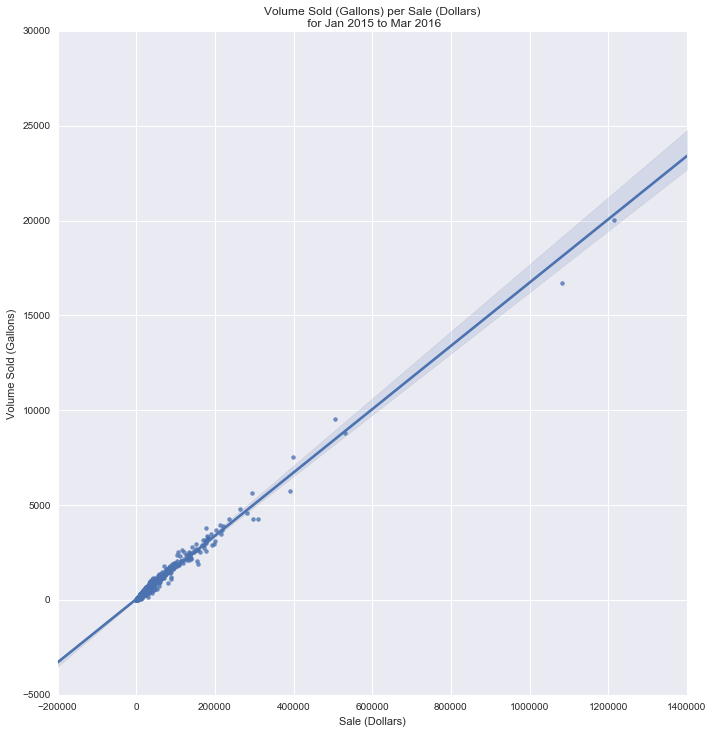

In [47]:
sns.lmplot(x='Sale (Dollars)', y='Volume Sold (Gallons)', data = modeler, size=10)\
.set(title='Volume Sold (Gallons) per Sale (Dollars)\n for Jan 2015 to Mar 2016')

In [48]:
modeler2 = modeler.drop('Sale (Dollars)',1)
modeler2.head()

,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
Store Number,,,,,,,,
2106,684160227,175235,595600,6722.95,10092.37,12573,11836.10,3127.28
2113,191207086,43223,175625,1994.22,2993.26,830,836.85,221.03
2130,531659974,129645,475375,5083.25,7627.72,9144,8436.27,2228.81
2152,167530495,38745,169875,1372.80,2065.50,670,720.87,190.39
2178,307983172,70428,302875,2833.94,4257.50,2408,2437.92,644.09


In [49]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(modeler2, modeler['Sale (Dollars)'])

In [50]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(1033, 8) (1033,) (345, 8) (345,)


In [51]:
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

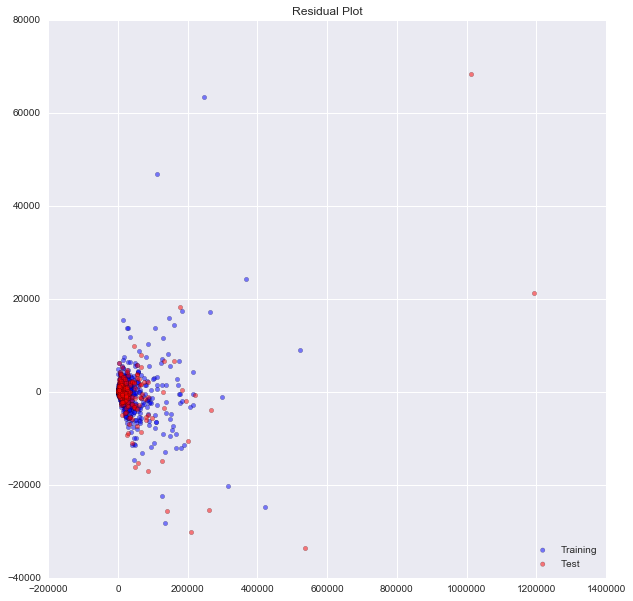

In [52]:
# Plot the train and test set.
plt.figure(figsize=(10,10))
train = plt.scatter(pred_train,(y_train-pred_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(y_test-pred_test),c='r',alpha=0.5)

plt.legend((train,test),('Training','Test'),loc='lower right')
plt.title('Residual Plot')
# Residual = Actual - Predicted

In [53]:
print 'MSE (Test):', np.mean((y_test - pred_test) ** 2)
print 'Score - R^2 (Test):', model.score(X_test, y_test) 

MSE (Test): 33771877.8095
Score - R^2 (Test): 0.996398464801


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.